In [54]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [55]:
#obtener datos
X, Y = load_planar_dataset()

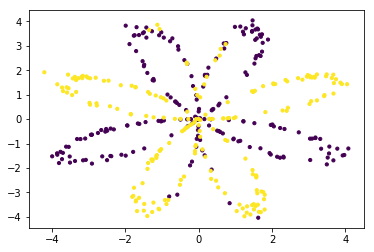

In [56]:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=10);
plt.show()

In [57]:
#ACTIVIDAD 1
shape_X =X.shape
shape_Y =Y.shape
m =X[0].shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [58]:
#REGRESION LOGISTICA SIMPLE
# Entrenando el clasificador de la regresión logística
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 47 %(percentage of correctly labelled datapoints)


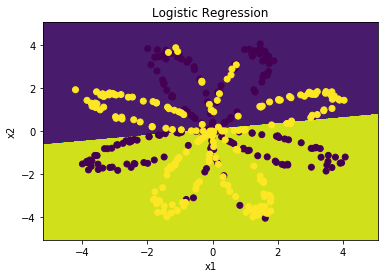

In [59]:
# Plot el límite de decisión para la regresión logística
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

# Imprimir la precesión ( accuracy)
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-
LR_predictions))/float(Y.size)*100) +
 '%' + "(percentage of correctly labelled datapoints)")


In [60]:
X.shape
Y.shape

(1, 400)

In [61]:
#actividad 2
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4 
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [62]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Tamaño de la capa de entrada: n_x = " + str(n_x))
print("Tamaño de la capa oculta: n_h = " + str(n_h))
print("Tamaño de la capa de salida: n_y = " + str(n_y))

Tamaño de la capa de entrada: n_x = 5
Tamaño de la capa oculta: n_h = 4
Tamaño de la capa de salida: n_y = 2


In [14]:
#ACTIVIDAD 3
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    w1=np.random.randn(n_h, n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y, n_h)*0.01
    b2=np.zeros((n_y,1))
    
    assert (w1.shape == (n_h, n_x))
    assert (b1.shape == ((n_h, 1)))
    assert (w2.shape == (n_y, n_h))
    assert (b2.shape == ((n_y, 1)))

    parameters = {"W1": w1,
        "b1": b1,
        "W2": w2,
        "b2": b2
    }
    return parameters

In [15]:

# Probando la Funcion
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [16]:
# actividad 4
def forward_propagation(X, parameters):
    
    w1= parameters["W1"]
    b1= parameters["b1"]
    w2= parameters["W2"]
    b2= parameters["b2"]
    
    # Implementando forward progation 
    z1=np.dot(w1,X) + b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1) + b2
    a2=sigmoid(z2)
    
    assert(a2.shape == (1 , X.shape[1]))
    cache = { "Z1":z1,
             "A1":a1,
             "Z2":z2,
             "A2":a2 }
    
    return a2 , cache 

In [44]:
# Probando la función
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: Se calcula la media solo para asegurarnos de que su salida coincida
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))


0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [53]:
#implementando funcion costo
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logg = (Y*np.log(A2)) + (1 - Y)*(np.log(1 - A2))
    cost = (-1/m)*(np.sum(logg))
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

In [35]:
# Probando la función
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [350]:
#BACKWARD_PROPAGATION
def backward_propagation(parameters, cache, X, Y):
    
    m= X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    #recuperar datos
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    #backWard Progation: calcula dw1 , db1 , dw2 , db2
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2 , A1.T) 
    db2 = (1/m) * np.sum(dZ2 , axis = 1 , keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2 ) , (1 -np.power(A1,2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims =True)
    
    grads = {
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    return grads
    

In [351]:
# Probando la función
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))


dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [352]:
#ACTIVIDAD 7: Actualización de los parámetros
def update_parameters(parameters, grads, learning_rate = 1.2):
    #Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Actualizando los parámetros
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                 }
    return parameters
    

In [353]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [354]:
#ACTIVIDAD 8 - Construye tu modelo de red neuronal en nn_model ()
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate=1.2 , print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Llamando a la función: Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["W2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Llamando a la función: Forward propagation
        A2 , cache = forward_propagation(X, parameters)
        
        # Llamando a la función: Cost function.
        cost = compute_cost(A2 , Y , parameters)
        
        # llamando a la funcion : Backprogation
        grads = backward_propagation(parameters, cache , X  , Y)
        
        # llamando a la funcion : actualizar pesos
        parameters = update_parameters(parameters, grads , learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Costo despues de iteracion: ",i," = ", cost)
    return parameters
    

In [355]:
alpha = 0.01
num_iterations = 100000
d = nn_model(X , Y , n_h , num_iterations , alpha , print_cost=True)
print (d)

Costo despues de iteracion:  0  =  0.6930480201239823
Costo despues de iteracion:  1000  =  0.688932572309688
Costo despues de iteracion:  2000  =  0.6775378463175364
Costo despues de iteracion:  3000  =  0.6703348893575363
Costo despues de iteracion:  4000  =  0.6496376254088237
Costo despues de iteracion:  5000  =  0.6306902415507508
Costo despues de iteracion:  6000  =  0.6218616797674815
Costo despues de iteracion:  7000  =  0.6171159617033553
Costo despues de iteracion:  8000  =  0.6136090975678596
Costo despues de iteracion:  9000  =  0.6106707129998841
Costo despues de iteracion:  10000  =  0.608163583891612
Costo despues de iteracion:  11000  =  0.6058905647297186
Costo despues de iteracion:  12000  =  0.6027834825648756
Costo despues de iteracion:  13000  =  0.5523938714990331
Costo despues de iteracion:  14000  =  0.4796720395330269
Costo despues de iteracion:  15000  =  0.43487504580834485
Costo despues de iteracion:  16000  =  0.4072831438868475
Costo despues de iteracion: 

In [356]:
#ACTIVIDAD 9
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.rint(A2)
    return predictions

In [357]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Costo despues de iteracion:  0  =  0.6930480201239823
Costo despues de iteracion:  1000  =  0.28808329356901835
Costo despues de iteracion:  2000  =  0.25438549407324496
Costo despues de iteracion:  3000  =  0.233864150389522
Costo despues de iteracion:  4000  =  0.22679248744854008
Costo despues de iteracion:  5000  =  0.22264427549299015
Costo despues de iteracion:  6000  =  0.21973140404281316
Costo despues de iteracion:  7000  =  0.21750365405131294
Costo despues de iteracion:  8000  =  0.21950396469467315
Costo despues de iteracion:  9000  =  0.2185709575018246


Text(0.5, 1.0, 'Límite de decisión para el tamaño de capa oculta 4')

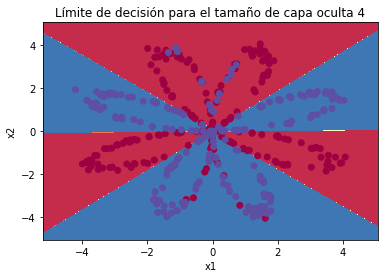

In [359]:
#UTILIZANDO EL MODELO CREADO
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
# plotea el limite de decision 
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
plt.title("Límite de decisión para el tamaño de capa oculta " + str(4))


In [330]:
# mostrando precision
predictions = predict(parameters, X)
print ('precision: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-
predictions.T))/float(Y.size)*100) + '%')


precision: 91%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.75 %


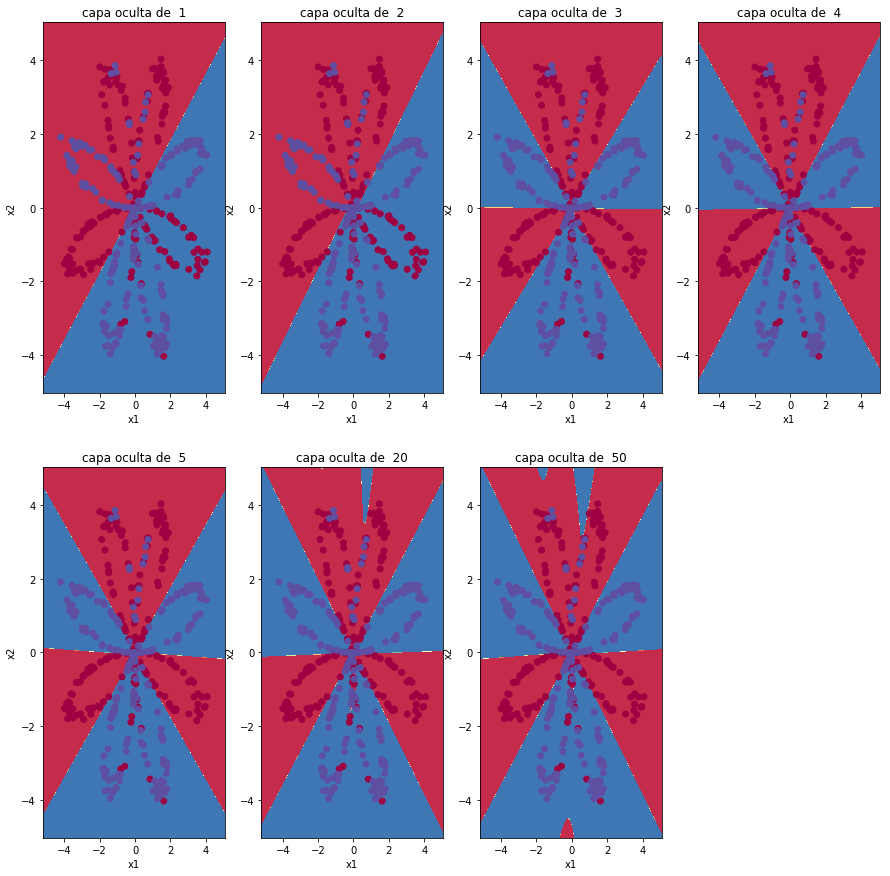

In [361]:
#AJUSTE DEL TAMAÑO DE LA CAPA OCULTA
plt.figure(figsize=(15, 15))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 4, i+1)
    plt.title('capa oculta de  %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
